# São Paulo 04/07/2019
## Analisando dados de cirurgias no DF

In [1]:
#Esplorando os dados das cirurgias
#Importando pandas
import pandas as pd
%matplotlib inline

In [3]:
#Aqui vou ler o arquivo
#Vamos importar apenas algumas colunas
# 3 - Hospital, 6- Municipio, 7 - Complexidade, 8 - Carater Atendimento, 12 - Sub Grupo Procedimento, 14- Procedimento

df = pd.read_csv('sih-janeiro-2017-cirurgias-eletiva-e-emergencia.csv', sep=';', encoding='cp1252', usecols=[3,6,7,8,12,14])
#Renomeando as colunas
df.columns = ['Hospital','Municipio','Complexidade','Carater Atendimento','Sub Grupo Procedimento','Procedimento']

In [5]:
df.head(2)

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA


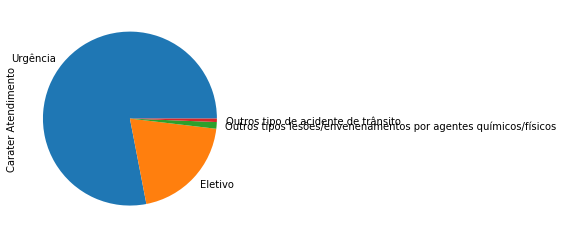

In [8]:
#Agora por curiosidade erei produzir um grafico por urgencia
df['Carater Atendimento'].value_counts().plot.pie()

In [19]:
#Descrevendo os dados
df.describe()

,Hospital,Municipio,Complexidade,Carater Atendimento,Sub Grupo Procedimento,Procedimento
count,4862,4862,4862,4862,4862,4862
unique,16,11,2,4,16,495
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
freq,735,1923,4353,3794,1539,1060


In [13]:
df['Hospital'].unique()

array(['6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB',
       '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL',
       '0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA', '0010545 HRBZ',
       '0010480 HOSPITAL REGIONAL DE CEILANDIA',
       '3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL',
       '0010472 HRG', '0010510 HOSPITAL UNIVERSITARIO DE BRASILIA',
       '0010529 HRPL',
       '0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB',
       '3055450 CBV CENTRO BRASILEIRO DA VISAO',
       '2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA', '0010502 HRS',
       '5717515 HRSM', '2645157 HRPA', '0010464 HRAN'], dtype=object)